# Análise

**Dataset:** Atlas de Vulnerabilidade Social - IPEA: https://ivs.ipea.gov.br/#/repositorio#shapes
<br>
**Autoras:** Jéssica Bernardo e Nathália Pereira
<br>
**Objetivo:** Examinar como as diferenças raciais impactam as oportunidades e condições de vida das mulheres no Brasil, considerando dimensões sociais, econômicas e educacionais.

Etapa 1: ***Tratamento de dados***

In [2]:
#importação dos módulos e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# leitura do arquivo
df = pd.read_excel('Atlas.xlsx')

In [4]:
# print(df.head())
# print(df.info())
# print(df.describe())
# print(df.columns)

In [5]:
# filtragem
df=df[df['label_cor'] != 'Total Cor']
df=df[df['label_sit_dom'] == 'Total Situação de Domicílio']

df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       480 non-null    int64  
 1   ano                      480 non-null    int64  
 2   nome_regiao              480 non-null    object 
 3   uf                       480 non-null    int64  
 4   nome_uf                  480 non-null    object 
 5   nome_rm                  480 non-null    object 
 6   label_cor                480 non-null    object 
 7   label_sexo               480 non-null    object 
 8   label_sit_dom            480 non-null    object 
 9   ivs                      357 non-null    float64
 10  idhm                     456 non-null    float64
 11  prosp_soc                357 non-null    object 
 12  t_m10a17_filho           480 non-null    object 
 13  t_mchefe_fundin_fmenor   480 non-null    object 
 14  t_p15a24_nada            4

In [7]:
# remoção de colunas
df.drop(columns={'id','uf', 'nome_rm', 'label_sit_dom', 't_fectot', 'rdpc_def_vulner', 't_analf_18m', 't_carteira_18m', 't_mchefe_fundin_fmenor'}, inplace=True)

In [9]:
#substituição do hífen por valor nulo
df.replace({'-': None}, inplace=True)

#susbtituição da vírgula por ponto
df.loc[:, ['t_m10a17_filho', 't_p15a24_nada', 't_desocup18m', 'espvida', 't_pop18a20_medioc', 'renda_per_capita', 'populacao', 'mchefe_fmenor', 'pea10a14', 'pea15a17', 'pea18m', 't_scarteira_18m', 't_setorpublico_18m', 't_contapropria_18m',   't_empregador_18m', 't_formal_18m',  't_fundc_ocup18m', 't_medioc_ocup18m', 't_supec_ocup18m', 't_renda_todos_trabalhos', 't_nremunerado_18m']] = df.loc[:, ['t_m10a17_filho', 't_p15a24_nada', 't_desocup18m', 'espvida', 't_pop18a20_medioc', 'renda_per_capita', 'populacao', 'mchefe_fmenor', 'pea10a14', 'pea15a17', 'pea18m', 't_scarteira_18m', 't_setorpublico_18m', 't_contapropria_18m',   't_empregador_18m', 't_formal_18m',  't_fundc_ocup18m', 't_medioc_ocup18m', 't_supec_ocup18m', 't_renda_todos_trabalhos', 't_nremunerado_18m']].replace({',': '.'}, regex=True) 

#susbtituição da vírgula por ponto
df['label_cor'] = df['label_cor'].replace({'Branco': 'Brancas', 'Negro': 'Negras'})

# df.loc[:, seleciona todas as linhas do dataframe | regex para alterar os valores que estão como string

In [10]:
# tipagem
df[['t_m10a17_filho', 't_p15a24_nada', 't_desocup18m', 'espvida', 't_pop18a20_medioc', 'renda_per_capita', 'populacao', 'mchefe_fmenor', 'pea10a14', 'pea15a17', 'pea18m', 't_scarteira_18m', 't_setorpublico_18m', 't_contapropria_18m',   't_empregador_18m', 't_formal_18m',  't_fundc_ocup18m', 't_medioc_ocup18m', 't_supec_ocup18m', 't_renda_todos_trabalhos', 't_nremunerado_18m']] = df[['t_m10a17_filho', 't_p15a24_nada', 't_desocup18m', 'espvida', 't_pop18a20_medioc', 'renda_per_capita', 'populacao', 'mchefe_fmenor', 'pea10a14', 'pea15a17', 'pea18m', 't_scarteira_18m', 't_setorpublico_18m', 't_contapropria_18m',   't_empregador_18m', 't_formal_18m',  't_fundc_ocup18m', 't_medioc_ocup18m', 't_supec_ocup18m', 't_renda_todos_trabalhos', 't_nremunerado_18m']].apply(lambda x: x.astype(float))

df[['ano']] = df[['ano']].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ano                      480 non-null    object 
 1   nome_regiao              480 non-null    object 
 2   nome_uf                  480 non-null    object 
 3   label_cor                480 non-null    object 
 4   label_sexo               480 non-null    object 
 5   ivs                      357 non-null    float64
 6   idhm                     456 non-null    float64
 7   prosp_soc                357 non-null    object 
 8   t_m10a17_filho           456 non-null    float64
 9   t_p15a24_nada            456 non-null    float64
 10  t_desocup18m             456 non-null    float64
 11  espvida                  456 non-null    float64
 12  t_pop18a20_medioc        456 non-null    float64
 13  renda_per_capita         456 non-null    float64
 14  populacao                4

In [13]:
#remoção de duplicados
df.duplicated()
# df.drop_duplicates()

#remoção de linhas 100% vazias
df.dropna(how='all', inplace=True)

In [14]:
# print(df.head(5))
# print(df.info())

In [15]:
# gerando documento final

df.to_csv('atlas_mulher_espectro_racial.csv', index='index')

Etapa 2: ***Representações gráficas***

**Pergunta 1:**\
A renda per capita mediana de 2018-2022 de mulheres brancas é maior que a de mulheres negras?

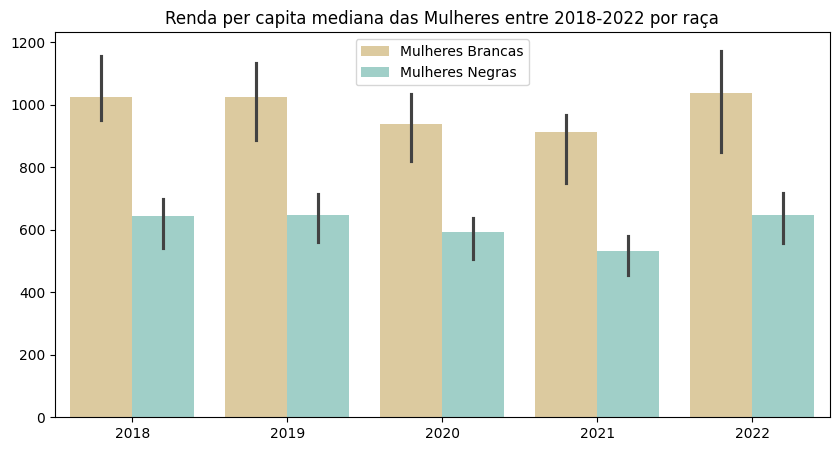

In [16]:
pd.set_option('future.no_silent_downcasting', True) #sugestao jupyter notebook
df.replace({'Brancas': 'Mulheres Brancas', 'Negras': 'Mulheres Negras'}, inplace=True) #renomear legenda

# PLOTAGEM GRÁFICA
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(data=df, x='ano', y='renda_per_capita', estimator='median', hue='label_cor', palette='BrBG')
plt.title('Renda per capita mediana das Mulheres entre 2018-2022 por raça')
plt.xlabel('')
plt.ylabel('')
ax1.legend(title='')

plt.show()


*Insights*

A mediana da renda per capita entre mulheres brancas e mulheres negras nos anos de 2018 a 2022 se mantém com uma desigualdade alta, que pode estar associada a fatores de oportunidade de ascensão social considerando aspectos sociais, economicos e educacionais. Os dados demonstram uma queda na mediana da renda para os anos de pandemia (2020 e 2021) e evidenciam ainda mais a desproporcionalidade de renda entre as mulheres negras, fomentando possíveis análises do fator trabalho formal e políticas públicas.


**Pergunta 2:**
Qual é a taxa de formalidade no emprego entre pessoas brancas e pretas nas diversas regiões do Brasil?

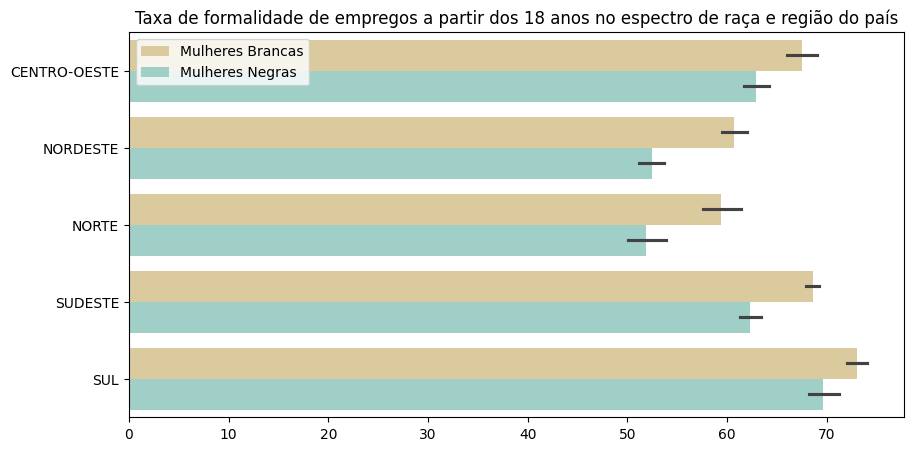

In [17]:
mulher_branca = df[df['label_cor'] == 'Mulheres Brancas']
mulher_negra = df[df['label_cor'] == 'Mulheres Negras']

# PLOTAGEM GRÁFICA
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=df, y='nome_regiao', x='t_formal_18m', hue='label_cor', palette='BrBG', linewidth=0)

plt.title('Taxa de formalidade de empregos a partir dos 18 anos no espectro de raça e região do país')
plt.xlabel('')
plt.ylabel('')
ax.legend(title='')
plt.show()

*Insights*

Observamos que, em todas as regiões do Brasil, as mulheres negras apresentam taxas de formalidade significativamente inferiores em comparação às mulheres brancas. A região Norte se destaca por apresentar as menores taxas de formalidade para ambas as raças. Essa situação é exacerbada por desafios econômicos significativos enfrentados por essa região, que contribuem para a alta informalidade no mercado de trabalho. 

**Pergunta 3**:
Qual é a cor predominante entre a população com a maior taxa de trabalho precoce?

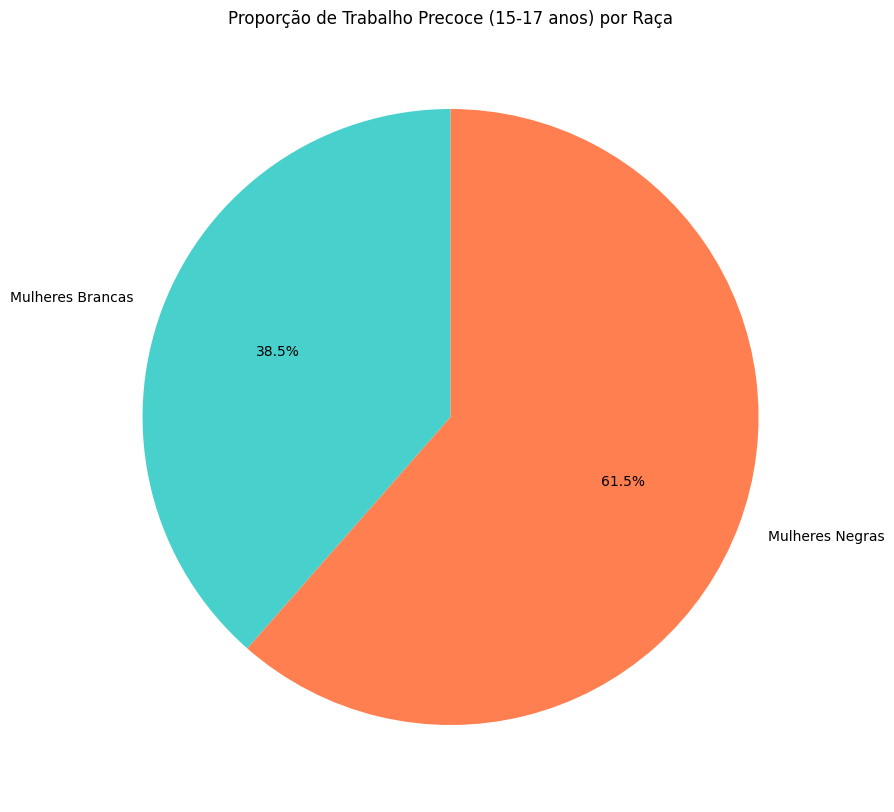

In [18]:
# Alterando os valores na coluna 'label_cor'
df['label_cor'] = df['label_cor'].replace({'Branco': 'Brancas', 'Negro': 'Negras'})

# Agrupando os dados por raça e somando o total da população economicamente ativa entre 15 e 17 anos
trabalho_precoce_por_raca = df.groupby('label_cor')['pea15a17'].sum().reset_index()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(trabalho_precoce_por_raca['pea15a17'], labels=trabalho_precoce_por_raca['label_cor'], autopct='%1.1f%%', startangle=90, colors=['mediumturquoise','coral'])
plt.title("Proporção de Trabalho Precoce (15-17 anos) por Raça")
plt.show()

*Insights*

Mulheres negras sao mais afetadas pelo trabalho precoce. Isso corrobora com uma série de fatores históricos e socioeconômicos que perpetuam desigualdades no acesso à educação e oportunidades de emprego para mulheres negras.

**Pergunta 4**:
De que maneira o índice de expectativa de vida reflete as disparidades raciais na qualidade de vida e no acesso à saúde?

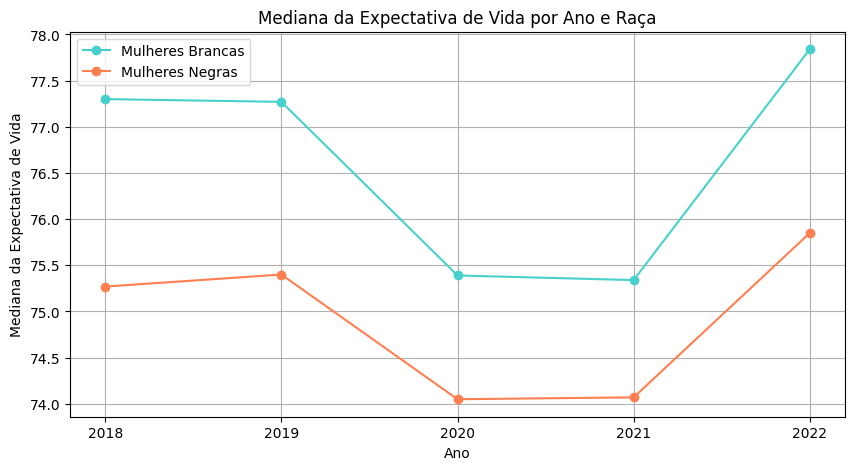

In [19]:
# Definindo tamanho da figura
plt.figure(figsize=(10, 5))

# Calculando a mediana da expectativa de vida por ano e raça
mediana_vida = df.groupby(['ano', 'label_cor'])['espvida'].median().reset_index()

# Separando os dados por raça
mediana_brancos = mediana_vida[mediana_vida['label_cor'] == 'Mulheres Brancas']
mediana_pretos = mediana_vida[mediana_vida['label_cor'] == 'Mulheres Negras']

# Criando o gráfico de linhas
plt.plot(mediana_brancos['ano'], mediana_brancos['espvida'], marker='o', label='Mulheres Brancas', color='mediumturquoise' )
plt.plot(mediana_pretos['ano'], mediana_pretos['espvida'], marker='o', label='Mulheres Negras', color='coral')

# Configurando os eixos e o título
plt.xlabel("Ano")
plt.ylabel("Mediana da Expectativa de Vida")
plt.title("Mediana da Expectativa de Vida por Ano e Raça")
plt.legend()

# Ajustando o eixo X para mostrar apenas os anos inteiros
plt.xticks(mediana_vida['ano'].unique())  # Mostra apenas os anos únicos presentes no conjunto de dados

# Exibindo o gráfico
plt.grid(True)
plt.show()


*Insights*

O gráfico demonstra que, em média, pessoas brancas vivem mais do que pessoas negras. Como a expectativa de vida é influenciada por uma combinação de fatores sociais, econômicos, de saúde, ambientais e comportamentais, esse resultado reflete a significativa disparidade no acesso a serviços essenciais entre esses grupos raciais.

